In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import pickle

In [2]:
# load the data
df = pd.read_csv('data/churn.csv')

# showing the shape (row, col) and  first 5 rows
print(df.shape)
df.head()

(10000, 13)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# removing columns that 'add no value': CustomerId, Surname
# these don't help prediction
df = df.drop(['CustomerId', 'Surname'], axis=1)

# checking the shape (row, col)
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# checking for null values
# if 0 - no missing data
# if value > 0 - we have missing data
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

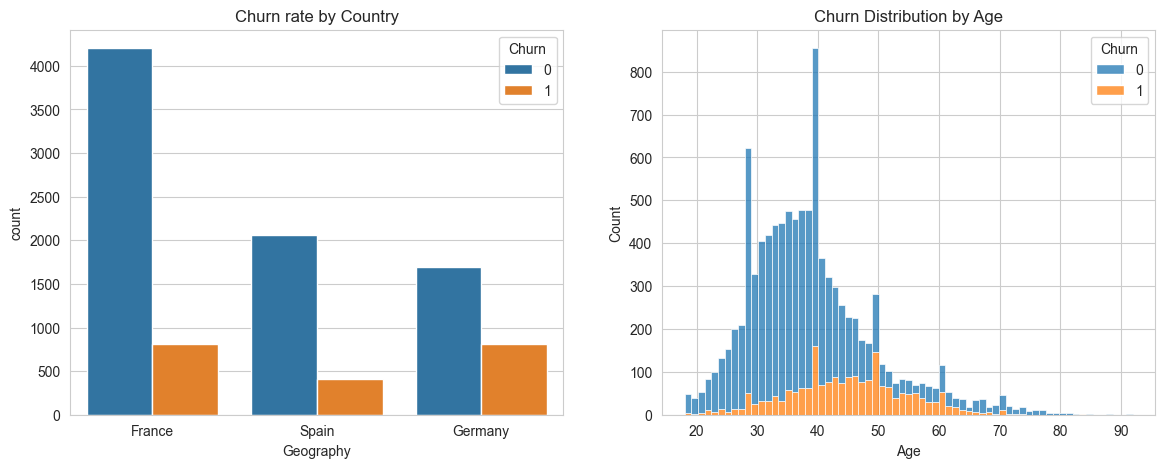

In [ ]:
# visual style
sns.set_style('whitegrid')

# Create a figure wtih 2 subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# plot 1: Churn by geography
sns.countplot(x='Geography', hue='Churn', data=df, ax=ax[0])
ax[0].set_title('Churn rate by Country')

# plot 2: Churn by age
sns.histplot(x='Age', hue='Churn', data=df, ax=ax[1], multiple='stack')
ax[1].set_title("Churn Distribution by Age")

plt.show()


In [ ]:
# Convert categorical variables into numbers (0 and 1)
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# check the new columns
df_encoded.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


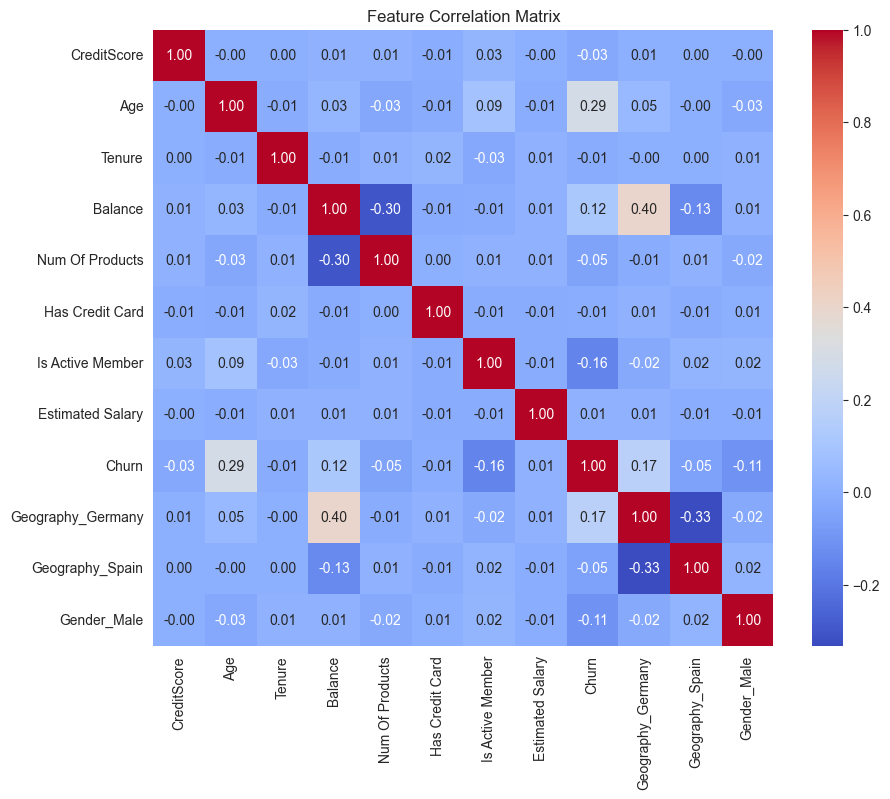

In [ ]:
# correlations
corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# 1. Define target (y) and features (X)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the data
# StandardScaler used to bring all values to a normal playing field
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit_tansform always used on training data
X_test_scaled = scaler.transform(X_test)        # transform ALWAYS used on test data

# 4. Train the Model (The "Brain")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Score the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 86.65%


In [9]:
# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler (Crucial! WE need to scale new data exactly like we scaled training data)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [10]:
print(X.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products',
       'Has Credit Card', 'Is Active Member', 'Estimated Salary',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')
